In [173]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [174]:
def euler_method(func, x0, y0, h, a, b):
    x_list = [x0]
    y_list = [y0]
    for i in np.arange(a + h, b + h, h):
        x = x_list[-1] + h
        y = y_list[-1] + h * func(x_list[-1], y_list[-1])
        x_list.append(round(x, 2))
        y_list.append(round(y, 6))
    return x_list, y_list


def improved_euler_method(func, x0, y0, h, a, b):
    x_list = [x0]
    y_list = [y0]
    for i in np.arange(a + h, b + h, h):
        x = x_list[-1] + h
        delta_y = h * func(x_list[-1] + h / 2, y_list[-1] + h / 2 * func(x_list[-1], y_list[-1]))
        y = y_list[-1] + delta_y
        x_list.append(round(x, 2))
        y_list.append(round(y, 6))
    return x_list, y_list


def runge_kuffa_method(func, x0, y0, h, a, b):
    x_list = [x0]
    y_list = [y0]
    for i in np.arange(a + h, b + h, h):
        x = x_list[-1] + h
        k1 = func(x_list[-1], y_list[-1])
        k2 = func(x_list[-1] + h / 2, y_list[-1] + h / 2 * k1)
        k3 = func(x_list[-1] + h / 2, y_list[-1] + h / 2 * k2)
        k4 = func(x_list[-1] + h, y_list[-1] + h * k3)
        delta_y = h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y_list[-1] + delta_y
        x_list.append(round(x, 2))
        y_list.append(round(y, 6))
    return x_list, y_list


In [175]:
def tasks(func, x0, y0, a, b, solution):
    print('Differential Eq: {}'.format(func.__name__))
    print('Initial condition: y({})={}'.format(x0, y0))
    print('Range: [{},{}]'.format(a, b))
    dic = dict()
    # T2
    x, y = euler_method(func, x0, y0, 0.1, a, b)
    dic['x'] = x
    print(x, y)
    # T1
    dic['T1'] = solution(x)
    dic['T2'] = y
    # T4
    _, y = improved_euler_method(func, x0, y0, 0.1, a, b)
    dic['T4'] = y
    # T6
    res6 = runge_kuffa_method(func, x0, y0, 0.1, a, b)
    dic['T6'] = y
    
    df = pd.DataFrame(dic)
    display(df)
    df.fillna(0, inplace=True)
    ax = df.plot(x='x', y='T1', color='Yellow', figsize=(20,10))
    df.plot(x='x', y='T2', color='Blue', ax=ax)
    df.plot(x='x', y='T4', color='Red', ax=ax)
    df.plot(x='x', y='T6', color='LightGreen', ax=ax)
    
    dic = dict()
    # T3
    x, y = euler_method(func, x0, y0, 0.05, a, b)
    dic['x'] = x
    # T1
    dic['T1'] = solution(x)
    dic['T3'] = y
    # T5
    _, y = improved_euler_method(func, x0, y0, 0.05, a, b)
    dic['T5'] = y
    # T7
    _, y = runge_kuffa_method(func, x0, y0, 0.05, a, b)
    dic['T7'] = y
    
    df = pd.DataFrame(dic)
    display(df)
    df.fillna(0, inplace=True)
    ax = df.plot(x='x', y='T1', color='Yellow', figsize=(20,10))
    df.plot(x='x', y='T3', color='Blue', ax=ax)
    df.plot(x='x', y='T5', color='Red', ax=ax)
    df.plot(x='x', y='T7', color='LightGreen', ax=ax)
    print()
    pass

In [176]:
def func1(x, y):
    try:
        return 2 * (x ** 2) + 3 * (y ** 2) - 2
    except OverflowError:
        return float('inf')


def solution1(x_list):
    def solve(x):
        return None  # non-linear o.d.e is not solved analytically
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list


def func2(x, y):
    try:
        return y + math.sqrt(x ** 2 + y ** 2)
    except OverflowError:
        return float('inf')


def solution2(x_list):
    def solve(x):
        return None  # non-linear o.d.e is not solved analytically
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list


def func3(x, y):
    try:
        return x ** 2 - 3 * x * y + y ** 2 - 3 * y
    except OverflowError:
        return float('inf')


def solution3(x_list):
    def solve(x):
        return None  # non-linear o.d.e is not solved analytically
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list


def func4(x, y):
    try:
        return (1 + x) / (1 - y ** 2)
    except OverflowError:
        return float('inf')


def solution4(x_list):
    def solve(x):
        return None  # non-linear o.d.e is not solved analytically
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list

Differential Eq: func1
Initial condition: y(2)=1
Range: [2,3]
[2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0] [1, 1.9, 3.665, 8.462668, 30.805693, 316.454909, 30360.617738, 276560494.599626, 2.2945712428517424e+16, 1.5795171565566571e+32, 7.484623343570481e+63]


,x,T1,T2,T4,T6
0,2.0,None,1.000000e+00,1.000000e+00,1.000000e+00
1,2.1,None,1.900000e+00,2.271250e+00,2.271250e+00
2,2.2,None,3.665000e+00,6.435323e+00,6.435323e+00
3,2.3,None,8.462668e+00,5.819249e+01,5.819249e+01
4,2.4,None,3.080569e+01,9.636176e+04,9.636176e+04
5,2.5,None,3.164549e+02,5.820801e+17,5.820801e+17
6,2.6,None,3.036062e+04,7.748804e+68,7.748804e+68
7,2.7,None,2.765605e+08,2.433562e+273,2.433562e+273
8,2.8,None,2.294571e+16,inf,inf
9,2.9,None,1.579517e+32,inf,inf


,x,T1,T3,T5,T7
0,2.00,None,1.000000e+00,1.000000e+00,1.000000e+00
1,2.05,None,1.450000e+00,1.535156e+00,1.550598e+00
2,2.10,None,2.085625e+00,2.391395e+00,2.469649e+00
3,2.15,None,3.079100e+00,4.084693e+00,4.530349e+00
4,2.20,None,4.863479e+00,9.023633e+00,1.496974e+01
5,2.25,None,8.795493e+00,4.463591e+01,4.144894e+04
6,2.30,None,2.080585e+01,5.705968e+03,1.355781e+57
7,2.35,None,8.616734e+01,8.985834e+11,inf
8,2.40,None,1.200341e+03,5.501073e+44,inf
9,2.45,None,2.173237e+05,7.726866e+175,inf


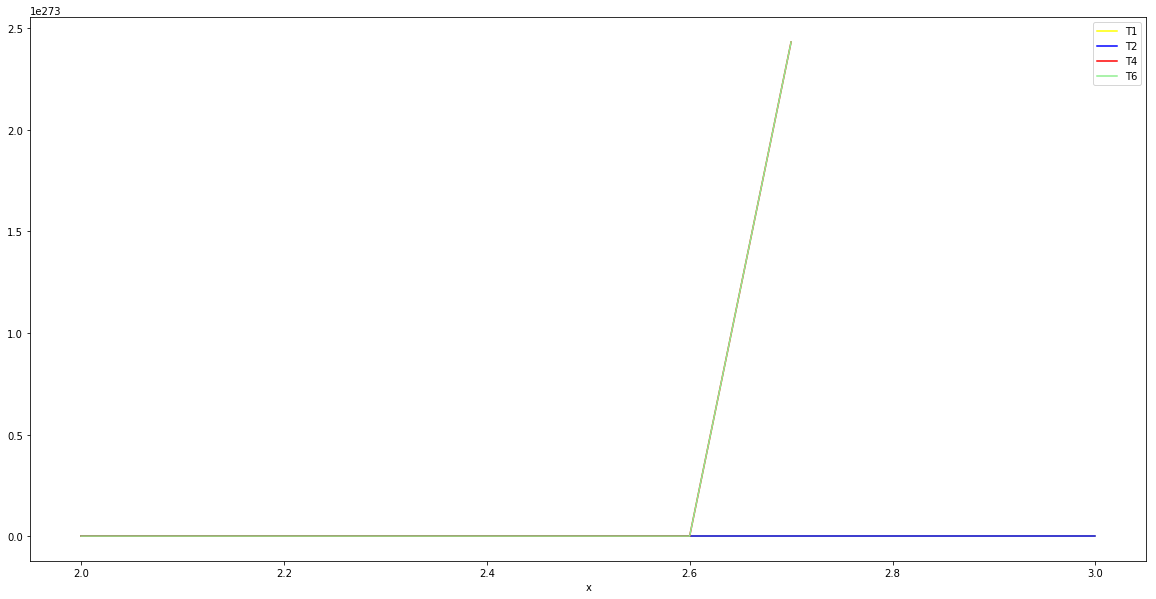

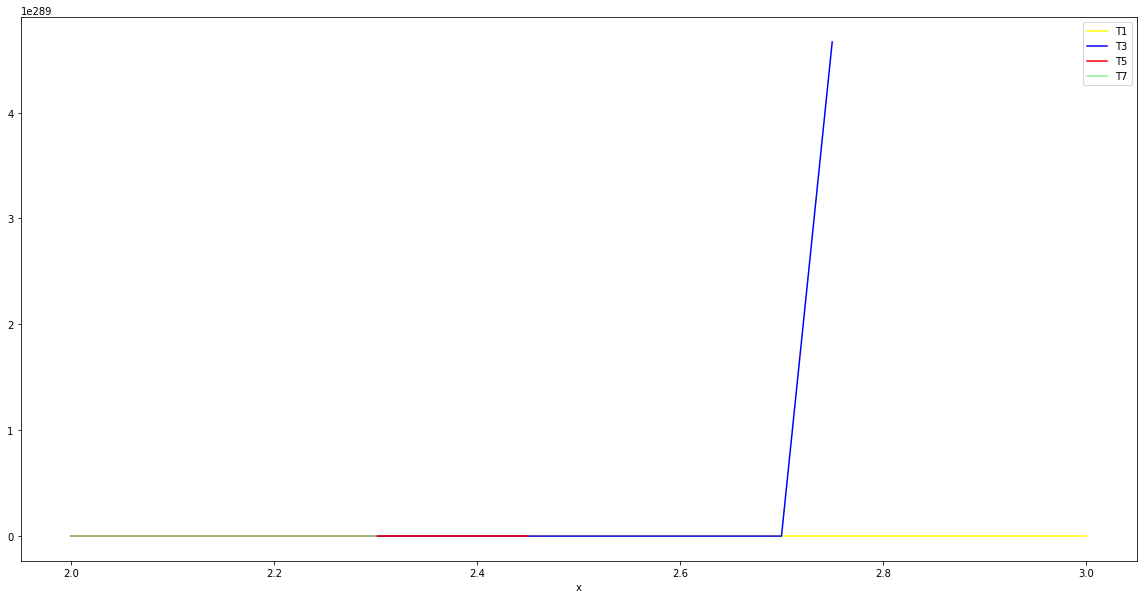

In [177]:
tasks(func1, 2, 1, 2, 3, solution1)

Differential Eq: func2
Initial condition: y(0)=1
Range: [0,1]
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [1, 1.2, 1.440416, 1.729881, 2.078439, 2.497941, 3.002484, 3.608917, 4.337426, 5.212227, 6.262386]


,x,T1,T2,T4,T6
0,0.0,None,1.000000,1.000000,1.000000
1,0.1,None,1.200000,1.220114,1.220114
2,0.2,None,1.440416,1.489415,1.489415
3,0.3,None,1.729881,1.819116,1.819116
4,0.4,None,2.078439,2.222603,2.222603
5,0.5,None,2.497941,2.716037,2.716037
6,0.6,None,3.002484,3.319038,3.319038
7,0.7,None,3.608917,4.055501,4.055501
8,0.8,None,4.337426,4.954567,4.954567
9,0.9,None,5.212227,6.051798,6.051798


,x,T1,T3,T5,T7
0,0.00,None,1.000000,1.000000,1.000000
1,0.05,None,1.100000,1.105015,1.105191
2,0.10,None,1.210057,1.221165,1.221554
3,0.15,None,1.331269,1.349701,1.350345
4,0.20,None,1.464817,1.491978,1.492926
5,0.25,None,1.611978,1.649473,1.650780
6,0.30,None,1.774139,1.823799,1.825530
7,0.35,None,1.952812,2.016728,2.018956
8,0.40,None,2.149649,2.230207,2.233016
9,0.45,None,2.366459,2.466380,2.469867


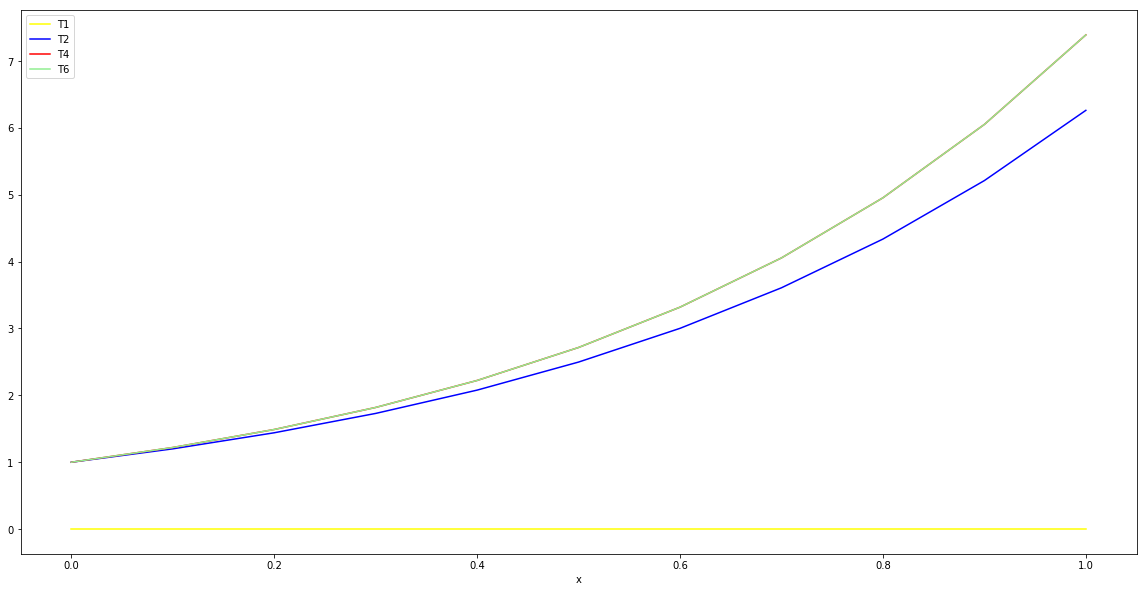

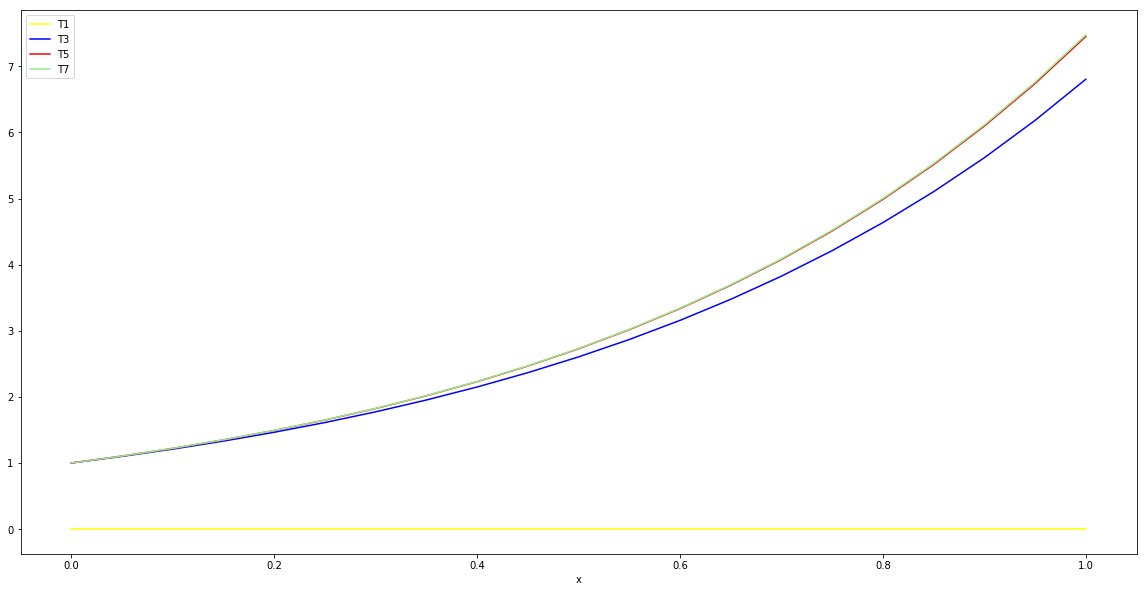

In [178]:
tasks(func2, 0, 1, 0, 1, solution2)

Differential Eq: func3
Initial condition: y(0)=2
Range: [0,1]
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [2, 1.8, 1.531, 1.218236, 0.900534, 0.619406, 0.40404, 0.262426, 0.184475, 0.152262, 0.148791]


,x,T1,T2,T4,T6
0,0.0,None,2.000000,2.000000,2.000000
1,0.1,None,1.800000,1.762750,1.762750
2,0.2,None,1.531000,1.468383,1.468383
3,0.3,None,1.218236,1.154556,1.154556
4,0.4,None,0.900534,0.861690,0.861690
5,0.5,None,0.619406,0.618878,0.618878
6,0.6,None,0.404040,0.437523,0.437523
7,0.7,None,0.262426,0.314495,0.314495
8,0.8,None,0.184475,0.239235,0.239235
9,0.9,None,0.152262,0.199600,0.199600


,x,T1,T3,T5,T7
0,0.00,None,2.000000,2.000000,2.000000
1,0.05,None,1.900000,1.890344,1.890340
2,0.10,None,1.781375,1.763002,1.763095
3,0.15,None,1.646613,1.621404,1.621678
4,0.20,None,1.499264,1.469919,1.470419
5,0.25,None,1.343786,1.313525,1.314240
6,0.30,None,1.185239,1.157368,1.158230
7,0.35,None,1.028857,1.006295,1.007190
8,0.40,None,0.879566,0.864444,0.865238
9,0.45,None,0.741539,0.734963,0.735531


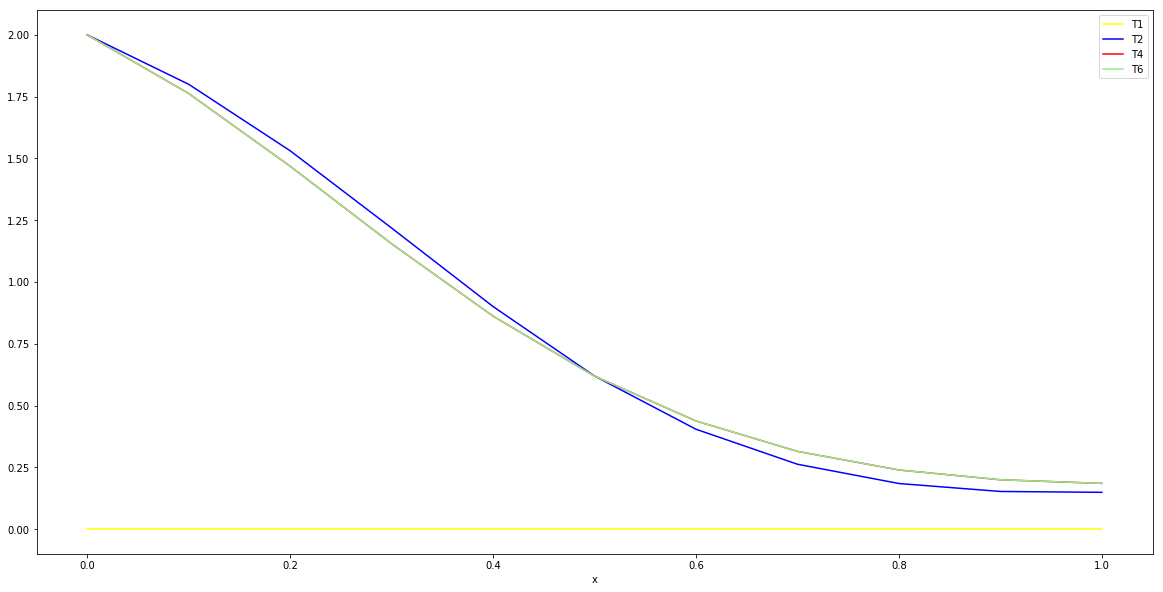

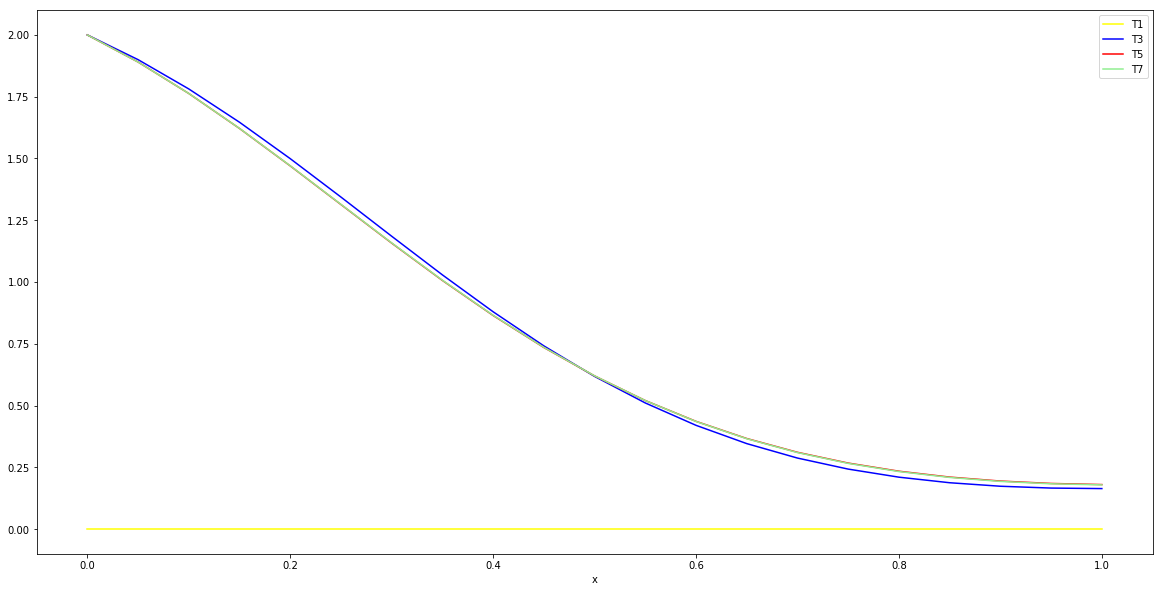

In [179]:
tasks(func3, 0, 2, 0, 1, solution3)

Differential Eq: func4
Initial condition: y(2)=3
Range: [2,3]
[2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0] [3, 2.9625, 2.922636, 2.880206, 2.834973, 2.786657, 2.734924, 2.679367, 2.619487, 2.55466, 2.484088]


,x,T1,T2,T4,T6
0,2.0,None,3.000000,3.000000,3.000000
1,2.1,None,2.962500,2.961333,2.961333
2,2.2,None,2.922636,2.920166,2.920166
3,2.3,None,2.880206,2.876269,2.876269
4,2.4,None,2.834973,2.829369,2.829369
5,2.5,None,2.786657,2.779140,2.779140
6,2.6,None,2.734924,2.725186,2.725186
7,2.7,None,2.679367,2.667017,2.667017
8,2.8,None,2.619487,2.604018,2.604018
9,2.9,None,2.554660,2.535401,2.535401


,x,T1,T3,T5,T7
0,2.00,None,3.000000,3.000000,3.000000
1,2.05,None,2.981250,2.980960,2.980958
2,2.10,None,2.961916,2.961320,2.961316
3,2.15,None,2.941975,2.941055,2.941049
4,2.20,None,2.921401,2.920138,2.920129
5,2.25,None,2.900166,2.898538,2.898526
6,2.30,None,2.878239,2.876223,2.876207
7,2.35,None,2.855587,2.853157,2.853137
8,2.40,None,2.832175,2.829301,2.829277
9,2.45,None,2.807963,2.804613,2.804584


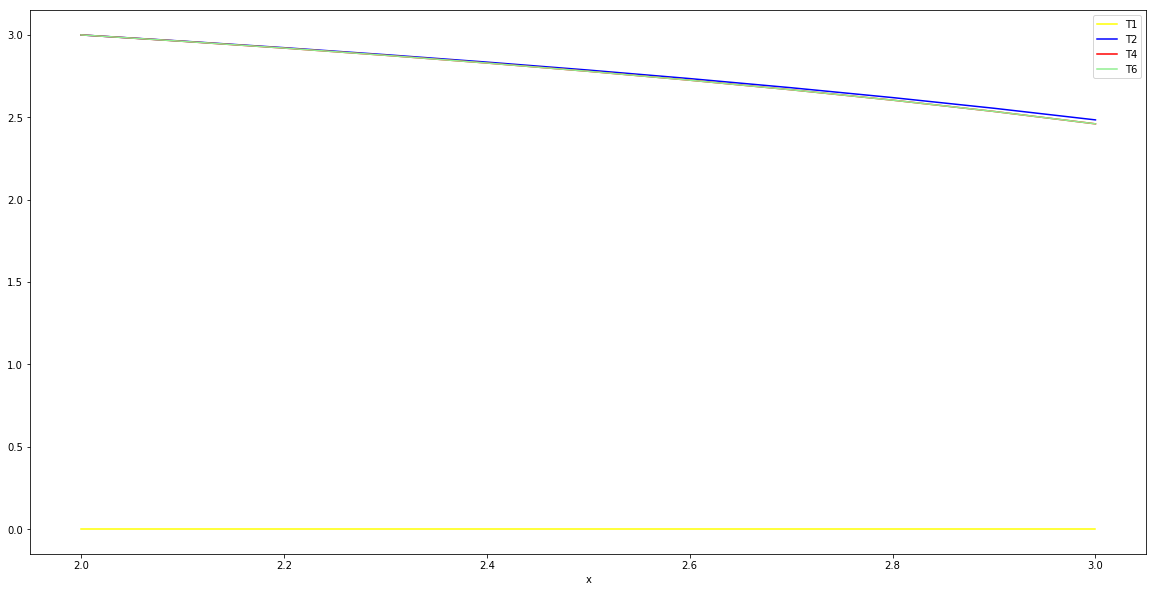

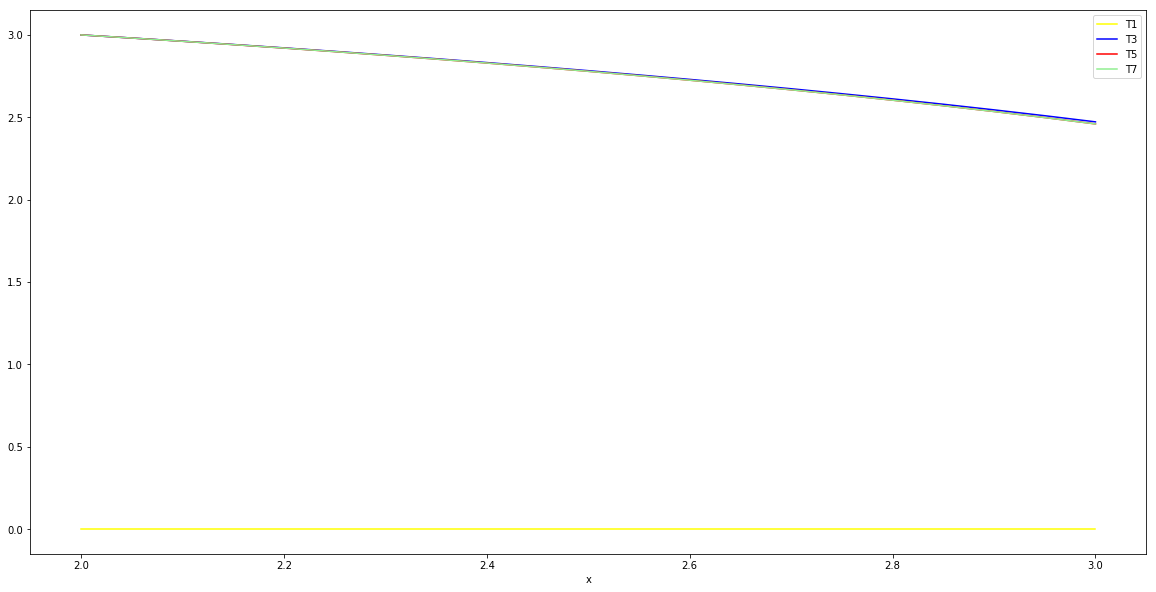

In [181]:
tasks(func4, 2, 3, 2, 3, solution4)